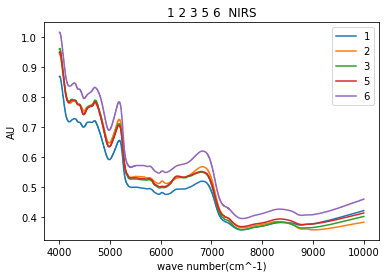

No [1,2,3,4,6,7,8,10,12,14,27,32,61,66,70] 所对应的预测OP为: [14, 13, 17, 16, 5, 14, 12, 16, 4, 9, 10, 10, 13, 10, 12]
随机取出的20个No为: [159 229 143 238 220  94  84 220 168 233 122 223 232 211 156 227 147 106
 188 114]
正确率: 0.65


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_near=pd.read_excel('data.xlsx',sheet_name=0)
data_medium=pd.read_excel('data.xlsx',sheet_name=1)

#D:\vscode\python\作业\data.xlsx 选定文件之后可以找到相对路径和绝对路径
#! 任务1
x=data_near[0:6].copy().drop(columns=['OP','No'])
x.index=pd.Series([1,2,3,4,5,6])
x.drop(index=4,inplace=True)
x_T = pd.DataFrame(x.values.T,columns=x.index,index=x.columns)
x_T.plot(xlabel='wave number(cm^-1)',ylabel='AU',title='1 2 3 5 6  NIRS',kind='line')#! 注意他画图是怎么画的 以index为x轴 以对应的数据为y轴 有多少个column就有多少条线 
plt.show()


#! 任务2
test1=data_near.dropna(axis='index').drop(columns=['No']).groupby(by='OP').mean()#! 'OP'变为index
x=test1.to_numpy()#! to_numpy之后index那一列就没了

test2=data_medium.dropna(axis='index').drop(columns=['No']).groupby(by='OP').mean()#! 'OP'变为index
y=test2.to_numpy()

#print(np.shape(x))#(17, 5996)
to_evaluate=np.array([1,2,3,4,6,7,8,10,12,14,27,32,61,66,70])  -1
ans_lst=[]
for i in to_evaluate:#! 如何取特定的行 
    temp1=data_near[i:i+1].copy().drop(columns=['No','OP']).to_numpy()
    
    temp2=data_medium[i:i+1].copy().drop(columns=['No','OP']).to_numpy()
    
    xx=np.sqrt(np.sum(np.square(x-temp1),axis=1))+np.sqrt(np.sum(np.square(y-temp2),axis=1))#!axis=1 沿着列动 所以是求每一行的和
    #print(np.shape(xx))
    ans_lst.append(np.argmin(xx)+1)
    # print(np.argmin(xx)+1)
    # print('-----------------')    

print('No [1,2,3,4,6,7,8,10,12,14,27,32,61,66,70] 所对应的预测OP为:',ans_lst)#[14, 13, 17, 16, 5, 14, 12, 16, 4, 9, 10, 10, 13, 10, 12]


#! 任务三


random_row=np.random.randint(80,240,size=20)
print('随机取出的20个No为:',random_row)
cnt=0
for i in random_row:#! 如何取特定的行 
    temp1=data_near[i:i+1].copy().drop(columns=['No','OP']).to_numpy()
    
    temp2=data_medium[i:i+1].copy().drop(columns=['No','OP']).to_numpy()
    
    xx=np.sqrt(np.sum(np.square(x-temp1),axis=1))+np.sqrt(np.sum(np.square(y-temp2),axis=1))#!axis=1 沿着列动 所以是求每一行的和
    #print(np.shape(xx))
    if np.argmin(xx)+1==data_near.at[i,'OP']:
        cnt+=1
    # print(np.argmin(xx)+1)
    # print('-----------------')    

print('正确率:',cnt/20)


In [4]:
print(data_medium[['OP','No']])

       OP   No
0     NaN    1
1     NaN    2
2     NaN    3
3     NaN    4
4    17.0    5
..    ...  ...
240  16.0  241
241   2.0  242
242  17.0  243
243  11.0  244
244   6.0  245

[245 rows x 2 columns]
